<a href="https://colab.research.google.com/github/stephinaeee/Skyline-Math-200/blob/main/Python_Notebook_2_Setup_by_Stephanie_Ayala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


In [ ]:
pip install researchPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import researchpy as rp

Research Question #2 :  Is there an association between how many people have you had a romantic or sexual relationship with and if you have ever been sexually abused?

Codebook 3:

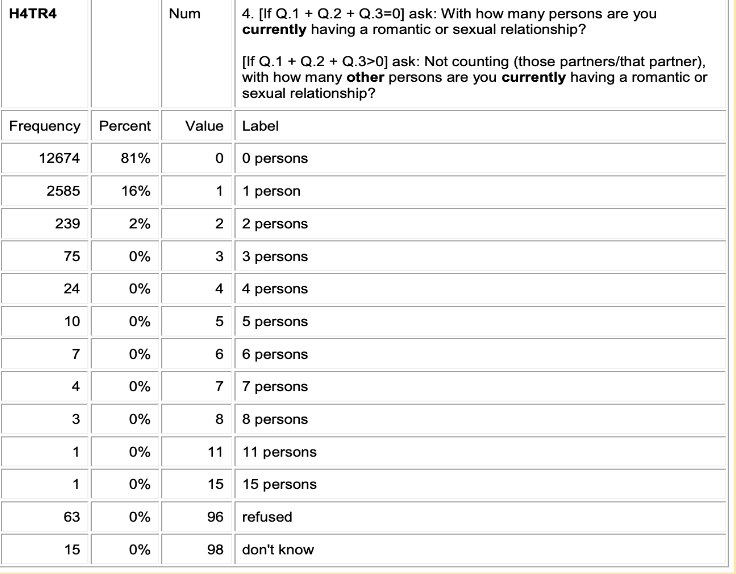

In [ ]:
#Manage data for variable 3
df['H4TR4'].dtype

dtype('O')

In [ ]:
df['Relationships'] = df['H4TR4']
df['Relationships'].dtype

dtype('O')

In [ ]:
df['Relationships'] = pd.to_numeric(df['Relationships'] , errors = 'coerce')
df['Relationships'].dtype

dtype('float64')

In [ ]:
df['Relationships'] = df['Relationships'].loc[df['Relationships'] < 96]
df['Relationships'].max()

11.0

In [ ]:
df['Relationships'].mean()

0.22056221741694515

In [ ]:
rp.summary_cont(df['Relationships'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Relationships,5087.0,0.2206,0.5546,0.0078,0.2053,0.2358


In [ ]:
rp.summarize(df['Relationships'])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,Relationships,5087,0.2206,0.0,0.3076,0.5546,0.0078,"[0.2053, 0.2358]"


In [ ]:
df['Relationships'].describe()

count    5087.000000
mean        0.220562
std         0.554630
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: Relationships, dtype: float64

<Axes: xlabel='Relationships', ylabel='Count'>

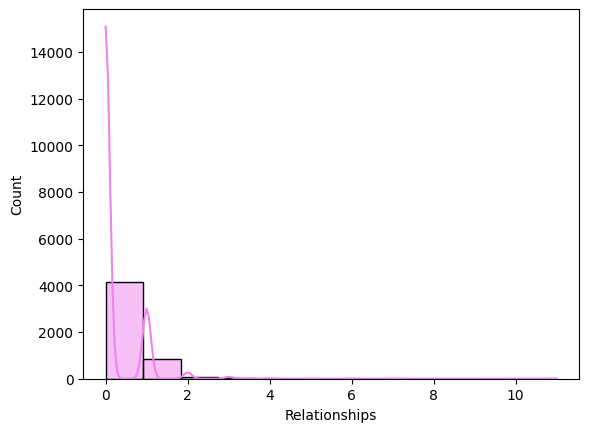

In [ ]:
##Graphs and tables or statistics
sns.histplot(x = 'Relationships', data = df, bins = 12, kde = True, color = 'violet')

<Axes: xlabel='Relationships'>

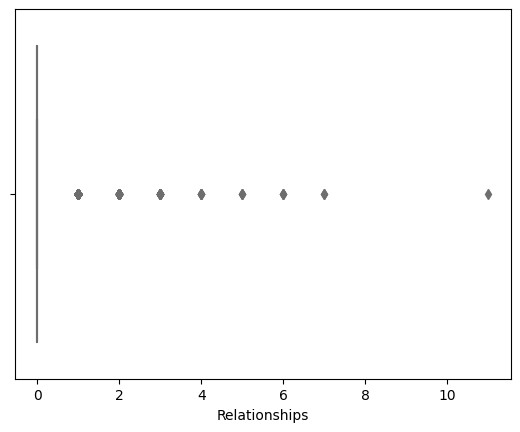

In [ ]:
sns.boxplot(x = 'Relationships', data = df, color = 'violet')

Codebook 4:

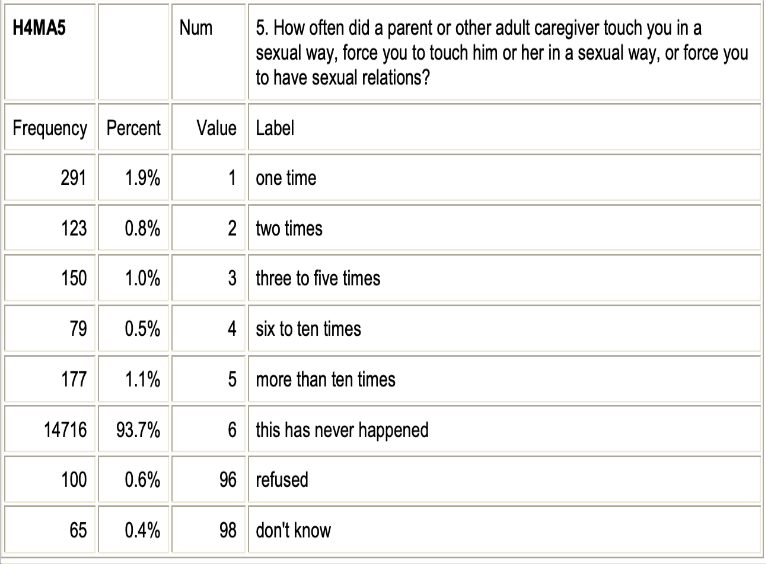

In [ ]:
#Manage data for variable 4
df['H4MA5'].value_counts()

6     4801
      1390
1       88
3       53
5       50
2       40
96      32
4       26
98      24
Name: H4MA5, dtype: int64

In [ ]:
df['Sexual_Abuse'] = df['H4MA5']
df['Sexual_Abuse'].value_counts()

6     4801
      1390
1       88
3       53
5       50
2       40
96      32
4       26
98      24
Name: Sexual_Abuse, dtype: int64

In [ ]:
df['Sexual_Abuse'] = df['Sexual_Abuse'].loc[ df['Sexual_Abuse'] != ' ']
df['Sexual_Abuse'].value_counts()

6     4801
1       88
3       53
5       50
2       40
96      32
4       26
98      24
Name: Sexual_Abuse, dtype: int64

In [ ]:
df['Sexual_Abuse'] = df['Sexual_Abuse'].loc[ df['Sexual_Abuse'] != '96']
df['Sexual_Abuse'] = df['Sexual_Abuse'].loc[ df['Sexual_Abuse'] != '98']
df['Sexual_Abuse'].value_counts()

6    4801
1      88
3      53
5      50
2      40
4      26
Name: Sexual_Abuse, dtype: int64

In [ ]:
df['Sexual_Abuse'].replace(['1','2','3','4','5','6'],['ONCE','TWICE','3-5 TIMES','6-10 TIMES','10 TIMES OR MORE','NEVER HAPPENED'], inplace = True)
df['Sexual_Abuse'].value_counts()

NEVER HAPPENED      4801
ONCE                  88
3-5 TIMES             53
10 TIMES OR MORE      50
TWICE                 40
6-10 TIMES            26
Name: Sexual_Abuse, dtype: int64

In [ ]:
rp.summary_cat(df['Sexual_Abuse'])

,Variable,Outcome,Count,Percent
0,Sexual_Abuse,NEVER HAPPENED,4801,94.92
1,,ONCE,88,1.74
2,,3-5 TIMES,53,1.05
3,,10 TIMES OR MORE,50,0.99
4,,TWICE,40,0.79
5,,6-10 TIMES,26,0.51


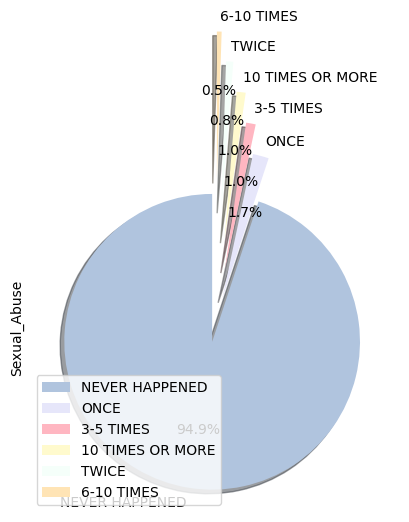

In [ ]:
#Graphs and tables or statistics
explode = (0.1, 0.2, 0.4, 0.6, 0.8, 1.0)
df['Sexual_Abuse'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=['lightsteelblue', 'lavender','lightpink','lemonchiffon','mintcream','moccasin'] , explode=explode, shadow=True, startangle=90)
plt.legend(loc ="lower left")

<Axes: title={'center': 'Have you ever been sexually abused?'}, ylabel='Percent'>

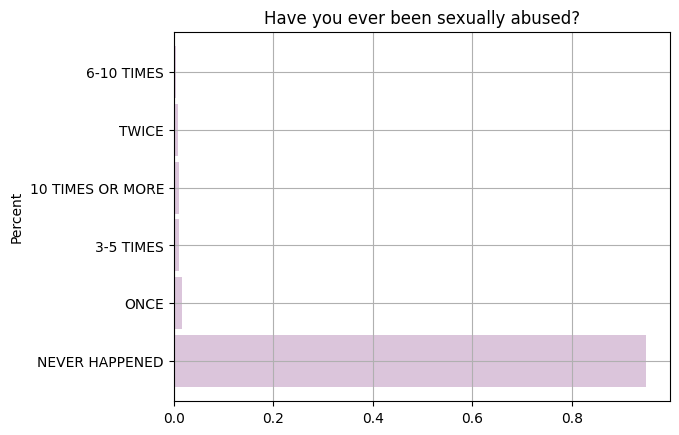

In [ ]:
plt.xlabel("Response")
plt.ylabel("Percent")
plt.title("Have you ever been sexually abused?")
df['Sexual_Abuse'].value_counts(normalize = True).plot(kind ='barh', color = 'thistle', width = 0.9, alpha = 0.9, grid = True)